<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в программирование"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# <center>Семинар 13. Python для анализа данных. Средства визуализации. NumPy, Pandas, Matplotlib, Seaborn
## <center>Практическое задание. Анализ данных пассажиров "Титаника"

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

**Описание признаков**

Survived   –     Выжил пассажир или нет (0/1) <br>
Pclass      –    Класс каюты (1/2/3) <br>
Name        –    Полное имя пассажира <br>
Sex        –     Пол <br>
Age        –     Взраст <br>
Sibsp      –     Число братьев/сестер/мужей/жен на борту <br>
Parch      –     Число родителей/детей на борту <br>
Ticket     –     Номер билета <br>
Fare       –     Стоимость билета <br>
Cabin      –     Номер палубы <br>
Embarked   –     Порт посадки пассажира (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


**Считываем обучающую выборку.**

In [7]:
train_df = pd.read_csv(r"C:\Users\Masha\Desktop\lab\titanic_train.csv") 

In [8]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Описание признаков**

survival   –     Выжил пассажир или нет (0/1) <br>
pclass      –    Класс каюты (1/2/3) <br>
name        –    Полное имя пассажира <br>
sex        –     Пол <br>
age        –     Взраст <br>
sibsp      –     Число братьев/сестер/мужей/жен на борту <br>
parch      –     Число родителей/детей на борту <br>
ticket     –     Номер билета <br>
fare       –     Стоимость билета <br>
cabin      –     Номер палубы <br>
embarked   –     Порт посадки пассажира (C = Cherbourg; Q = Queenstown; S = Southampton)

In [9]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Penasco y Castellana, Mr. Victor de Satode",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Заполним пропуски медианными значениями**

In [10]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

## Первичный анализ данных

**1. Сколько мужчин / жещин находилось на борту?**

In [16]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно – это же распределение только для мужчин / женщин по отдельности.**

In [42]:
pd.crosstab(train_df["Sex"], train_df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


**3. Сколько в среднем заплатил один пассажир? Найдите стандартное отклонение этой величины. Лучше округлить до 2 десятичных знаков.**

In [19]:
print("Mean fare: ", round(train_df['Fare'].mean(), 2))
print("Fare std: ", round(train_df['Fare'].std(), 2))

Mean fare:  32.2
Fare std:  49.69


**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" – те, кто моложе 30, а "старики" – те, кто старше 60.**

In [25]:
young_survived = train_df[train_df['Age'] < 30]["Survived"] == 1
old_survived = train_df[train_df['Age'] > 60]["Survived"] == 1

print("Доли выживыших: \n\t среди молодых {}%, \n\t среди старых {}%.".format(
    round(100 * young_survived.mean(), 2), round(100 * old_survived.mean(), 2)))

Доли выживыших: 
	 среди молодых 37.08%, 
	 среди старых 22.73%.


**5. Правда ли, что женщины выживали чаще мужчин?**

In [26]:
male_survived = train_df[train_df['Sex'] == "male"]["Survived"] == 1
female_survived = train_df[train_df['Sex'] == "female"]["Survived"] == 1


print("Доли выживыших: \n\t среди женщин {}%, \n\t среди мужчин {}%".format(
    round(100 * female_survived.mean(), 2), round(100 * male_survived.mean(), 2)))

Доли выживыших: 
	 среди женщин 74.2%, 
	 среди мужчин 18.89%


**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [117]:
import re
d = {}
temp = []
for name in train_df[train_df['Sex'] == "male"]["Name"]:
    res = re.search(".+?\. (.+)", name)
    a = res.group(1)
    if not a in d:
        d[a] = 1
    else:
        d[a] += 1

for key in d:
    temp.append(d[key])
m = max(temp)

for key in d:
    if d[key] == m:
        print(key)

John


**7. Сравните распределение стоимости билетов у спасенных и у погибших.**

In [48]:
pd.crosstab(train_df['Survived'], round(train_df['Fare'], 2))

Fare,0.0,4.01,5.0,6.24,6.44,6.45,6.5,6.75,6.86,6.95,...,153.46,164.87,211.34,211.5,221.78,227.52,247.52,262.38,263.0,512.33
Survived,,,,,,,,,,,,,,,,,,,,,
0,14,1,1,1,1,1,2,2,1,1,...,1,0,0,1,1,1,1,0,2,0
1,1,0,0,0,0,0,0,0,0,0,...,2,2,3,0,0,3,1,2,2,3


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [84]:
for pclass, sub_df in train_df.groupby('Pclass'):
    for sex, sub2_df in sub_df.groupby('Sex'):
        print(pclass, sex, sub2_df['Age'].mean())


1 female 33.97872340425532
1 male 38.99524590163934
2 female 28.70394736842105
2 male 30.512314814814815
3 female 23.572916666666668
3 male 26.911873198847264


## Первичный визуальный анализ данных

**9. Постройте попарные зависимости признаков `Age`, `Fare`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

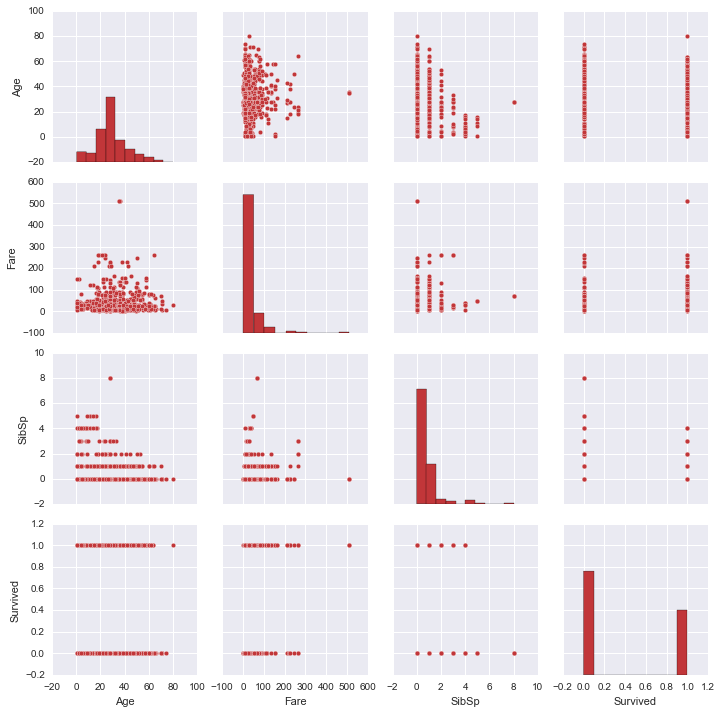

In [89]:
sns.pairplot(train_df[['Age', 'Fare', 'SibSp', 'Embarked', 'Survived']]);

**10. Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

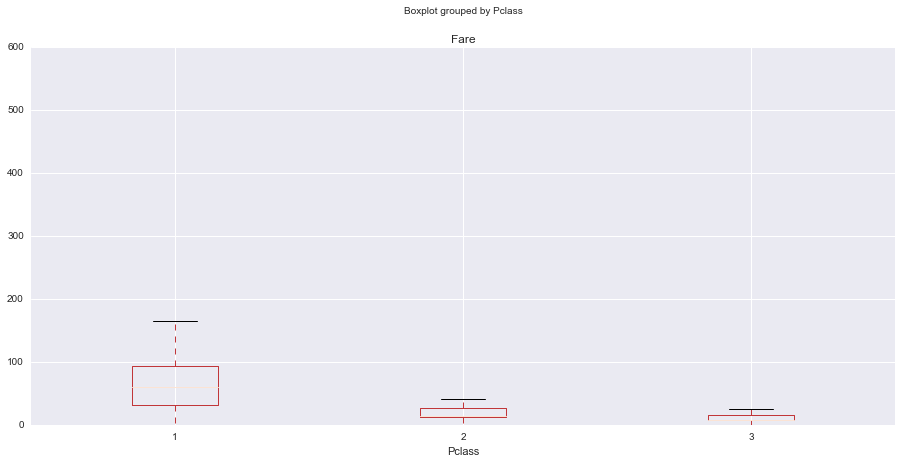

In [99]:
train_df.boxplot(column='Fare',  by='Pclass', figsize=(15, 7))
plt.show()


**11. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

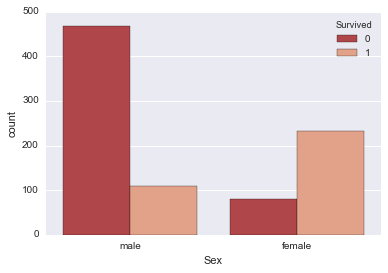

In [101]:
sns.countplot(x='Sex', hue='Survived', data=train_df);

**12. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

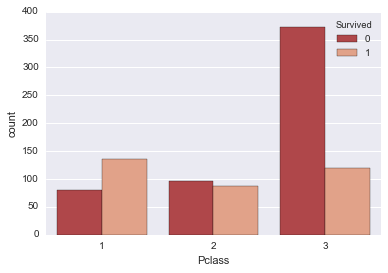

In [102]:
sns.countplot(x='Pclass', hue='Survived', data=train_df);

**13. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали.**

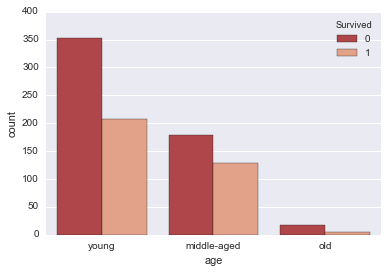

In [105]:
def age_category(age):
    return 'old' if age > 60\
            else 'young' if age < 30 else 'middle-aged'

train_df['age'] = train_df['Age'].apply(age_category)
sns.countplot(x='age', hue='Survived', data=train_df);